
# Adaboost Algorithms in Machine Learning

Adaboost (adaptive boosting) is a **family of algorithms that use a combination of multiple weak models** to produce a strong model. 

An ensemble machine learning algorithm that can be used in a wide variety of **classification and regression tasks**.

The **main idea is to assign higher weights to the models** that perform better and lower weights to the models that perform worse.

The Adaboost algorithm works as follows:

1. Initialize all the weights to be equal.
2. For each iteration, train a new model on the data with the current weights.
3. Calculate the error of the new model.
4. Update the weights of the models based on their error.
5. Repeat steps 2-4 until the desired number of iterations is reached.

The final prediction is made by taking a weighted vote over all the models. The weights are chosen such that the models with lower error have higher weights.


<img src="https://datamapu.com/images/adaboost/adaboost.png" style="width:1000px; height:700px"/>

The most common estimator used with AdaBoost is **decision trees** with **one level** which means Decision trees with **only 1 split**. These trees are also called **Decision Stumps**.

<img src="https://www.python-course.eu/images/Boosting_Decision_Stumps.png"/>

## 1. Adaboost Classifier

In [1]:
# import basic libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# get dataset
df = pd.read_csv('2_7_diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Explain diabetes dataset**
Link: https://www.kaggle.com/datasets/yashbansal1099/docspot

* Pregnancies: number of times pregnant (integer).

* Glucose: plasma glucose concentration — higher = higher blood sugar.

* BloodPressure: diastolic blood pressure (mm Hg).

* SkinThickness: triceps skinfold thickness (mm) — proxy for body fat.

* Insulin: 2‑hour serum insulin (mu U/ml) — post‑glucose insulin level.

* BMI: body mass index (kg/m²) — obesity indicator.

* DiabetesPedigreeFunction: family history-based risk score (higher = greater genetic risk).

* Age: age in years.

* Outcome: target (1 = diabetes, 0 = no diabetes).

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# I see some 0 values in the dataset, it is nonsense, lets see how many for each columns
df[df == 0].count()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# I cant delete the 0 values because it will change the shape of the dataset, 
# so I will replace them with median value except "Pregnancies" and "Outcome"               

In [10]:
#for example see the median of the columnns
for col in df.columns:
    print(col, df[col].median())

Pregnancies 3.0
Glucose 117.0
BloodPressure 72.0
SkinThickness 23.0
Insulin 30.5
BMI 32.0
DiabetesPedigreeFunction 0.3725
Age 29.0
Outcome 0.0


In [ ]:
# replacing zero values with the median of the columnns
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

# alternative with for loop
# for col in df.columns:
#     df[col] = df[col].replace(0, df[col].median())



In [ ]:
# lets see the clean dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


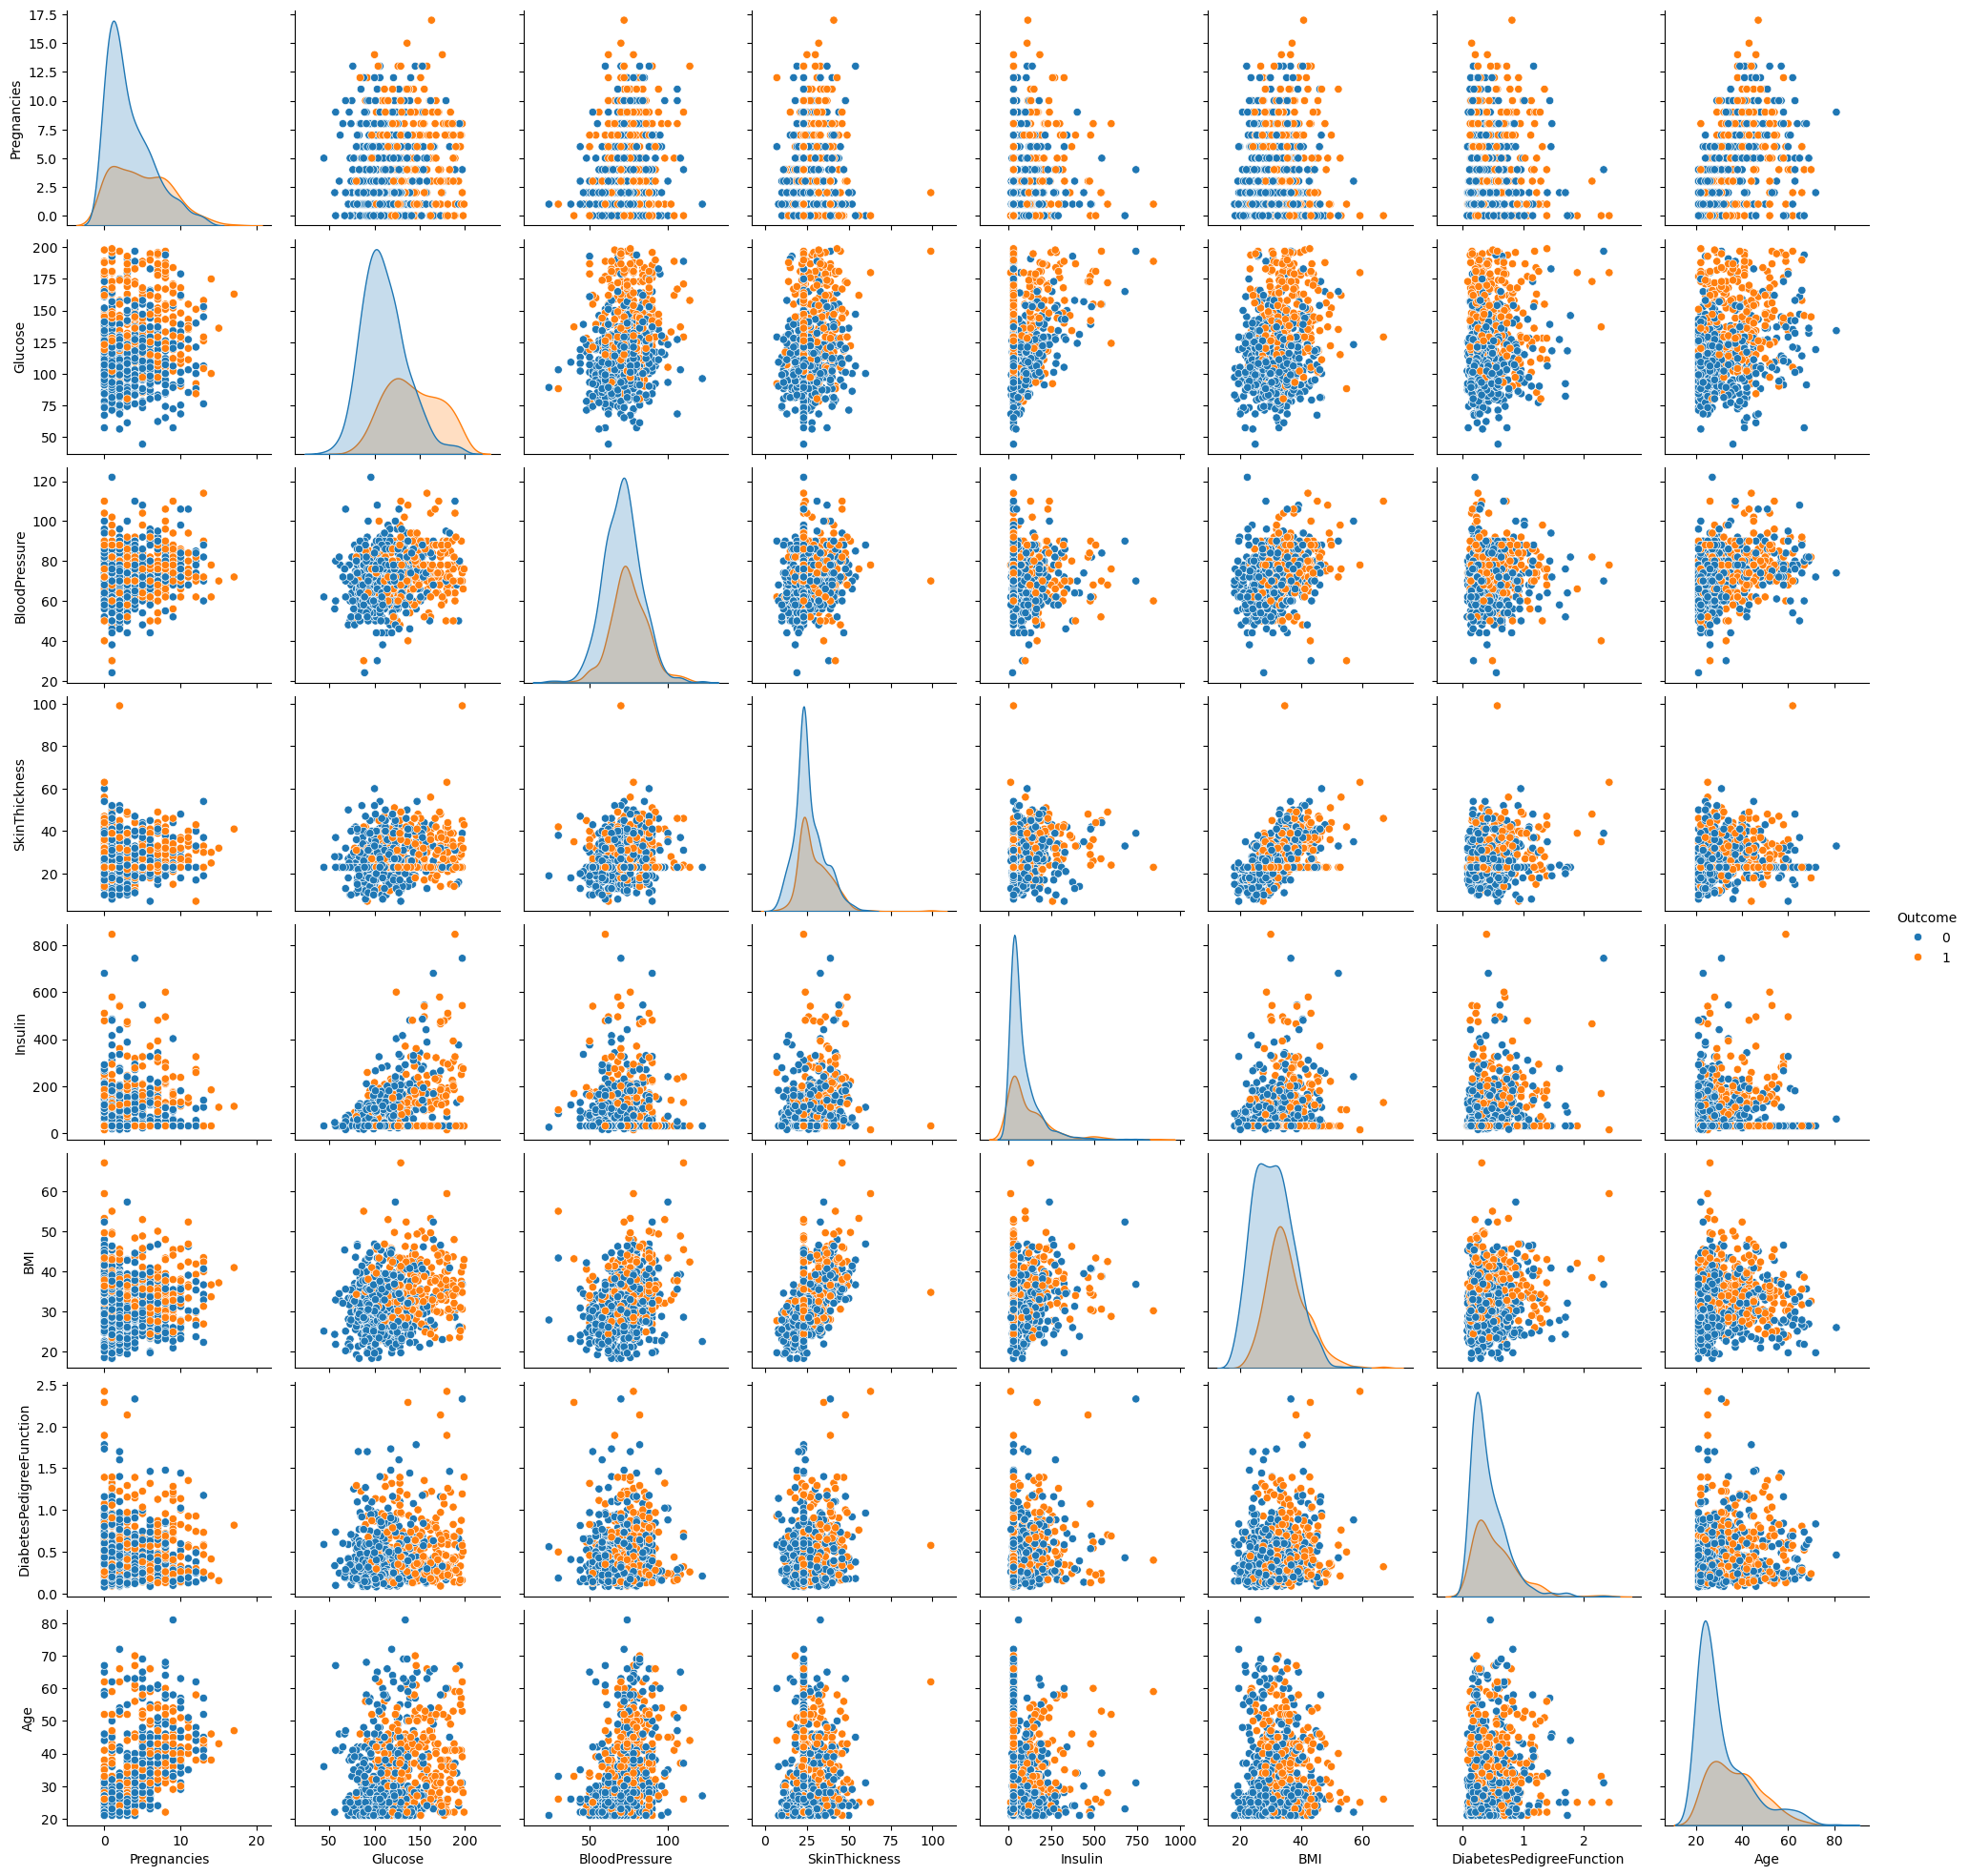

In [13]:
# see the relation between the features and the target
sns.pairplot(df, hue='Outcome')
plt.show()

In [14]:
# Split the dataset into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [15]:
# create a adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [16]:
# predict the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[79 20]
 [17 38]]


In [18]:
# alternative use with Tree Classifer explicitly inside Adboots classifier

from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

[[81 18]
 [16 39]]


In [20]:
# Hpyerparameter tuning Adaboost Classifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150, 200, 500],
    'learning_rate': [0.01,0.1, 0.5, 1.0, 2.0],
}

model = AdaBoostClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print('Best Parameters:', random_search.best_params_)
print('Best Score:', random_search.best_score_)

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'n_estimators': 100, 'learning_rate': 1.0}
Best Score: 0.7736372117819539
Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

[[81 18]
 [16 39]]
